##Python Project - Korean Exchange Rate Prediction Using LSTM Models
by Inhee Lee

Importing libraries

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras

Bringing and reading data sets

In [64]:
data = pd.read_csv("/Foreign_Exchange_Rates.csv", na_values = 'ND')
data[-10:]

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
5207,5207,2019-12-18,1.4590,0.8998,1.5202,0.7646,4.0624,1.3117,7.0029,7.7867,70.97,1168.02,18.958,14.302,1.3552,6.7240,109.58,4.1378,9.0203,9.4203,181.10,0.9819,30.15,30.20
5208,5208,2019-12-19,1.4520,0.8986,1.5135,0.7672,4.0580,1.3122,7.0097,7.7955,71.11,1165.04,18.941,14.215,1.3546,6.7148,109.23,4.1400,8.9619,9.4211,181.40,0.9777,30.16,30.19
5209,5209,2019-12-20,1.4489,0.9029,1.5135,0.7671,4.0859,1.3170,7.0063,7.7969,71.07,1160.30,18.914,14.232,1.3550,6.7443,109.45,4.1385,8.9673,9.4111,181.00,0.9824,30.14,30.19
5210,5210,2019-12-23,1.4457,0.9016,1.5088,0.7742,4.0621,1.3167,7.0124,7.7850,71.24,1163.64,18.931,14.187,1.3562,6.7356,109.39,4.1415,8.9470,9.4295,181.25,0.9820,30.14,30.16
5211,5211,2019-12-24,1.4445,0.9022,1.5058,0.7719,4.0833,1.3160,7.0064,7.7872,71.23,1163.21,18.955,14.143,1.3550,6.7399,109.38,4.1350,8.9142,9.4133,181.30,0.9807,30.14,30.15
5212,5212,2019-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5213,5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.7880,71.28,1161.18,18.944,14.132,1.3540,6.7295,109.67,4.1337,8.8799,9.4108,181.30,0.9808,30.11,30.15
5214,5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,71.45,1160.87,18.819,14.025,1.3520,6.6829,109.47,4.1260,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,5215,2019-12-30,1.4278,0.8915,1.4846,0.7610,4.0152,1.3058,6.9864,7.7857,71.30,1155.75,18.863,14.056,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.60,0.9677,30.04,29.94
5216,5216,2019-12-31,1.4225,0.8907,1.4826,0.7536,4.0190,1.2962,6.9618,7.7894,71.36,1155.46,18.860,13.973,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.30,0.9677,29.91,29.75


Plotting Korean exchange rate

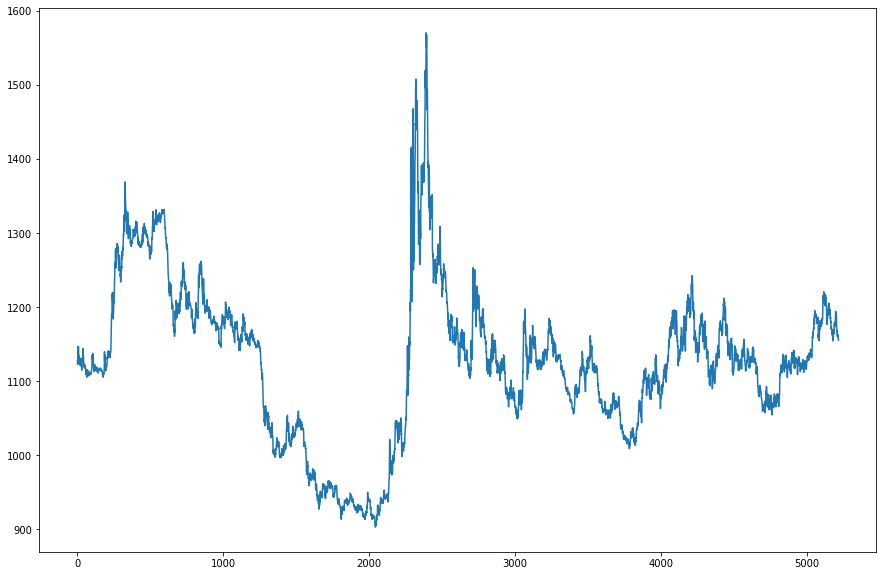

In [121]:
plt.figure(figsize=(15,10))
plt.plot(data['KOREA - WON/US$'])

Data frame

In [66]:
df = data['KOREA - WON/US$']

In [67]:
print(df)

0       1128.00
1       1122.50
2       1135.00
3       1146.50
4       1138.00
         ...   
5212        NaN
5213    1161.18
5214    1160.87
5215    1155.75
5216    1155.46
Name: KOREA - WON/US$, Length: 5217, dtype: float64


Preprocessing data

In [68]:
df = np.array(df).reshape(-1,1)

In [69]:
df

array([[1128.  ],
       [1122.5 ],
       [1135.  ],
       ...,
       [1160.87],
       [1155.75],
       [1155.46]])

Scaling min and max

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [71]:
df = scaler.fit_transform(df)

In [72]:
df

array([[0.33708202],
       [0.32883491],
       [0.34757835],
       ...,
       [0.38636977],
       [0.37869246],
       [0.37825761]])

Training and test sets

In [92]:
train = df[:4000]
test = df[4000:]

print(train.shape)
print(test.shape)

(4800, 1)
(417, 1)


In [115]:
def get_data(data, look_back):
  datax, datay = [],[]
  for i in range(len(data)-look_back-1):
    datax.append(data[i:(i+look_back),0])
    datay.append(data[i+look_back,0])
  return np.array(datax) , np.array(datay)

In [114]:
look_back = 1

x_train , y_train = get_data(train, look_back)
print(x_train.shape)
print(y_train.shape)

(4798, 1)
(4798,)


In [113]:
x_test , y_test = get_data(test,look_back)
print(x_test.shape)
print(y_test.shape)

(415, 1)
(415,)


In [112]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [111]:
print(x_train.shape)
print(x_test.shape)

(3998, 1, 1)
(1215, 1, 1)


Defining the LSTM model

In [108]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [109]:
n_features=x_train.shape[1]
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(1,1)))
model.add(Dense(n_features))

In [110]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


Compiling the model

In [116]:
model.compile(optimizer='adam', loss = 'mse')

Training the model

In [126]:
model.fit(x_train,y_train, epochs = 5, batch_size=1)

Epoch 1/5
4798/4798 [==============================] - 10s 2ms/step - loss: nan
Epoch 2/5
4798/4798 [==============================] - 10s 2ms/step - loss: nan
Epoch 3/5
4798/4798 [==============================] - 10s 2ms/step - loss: nan
Epoch 4/5
4798/4798 [==============================] - 10s 2ms/step - loss: nan
Epoch 5/5
4798/4798 [==============================] - 10s 2ms/step - loss: nan


Predicting usind the trained model

In [84]:
scaler.scale_

array([0.00149948])

In [130]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred[:10])

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [131]:
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.inverse_transform(y_test)
print(y_test[:10])

[[1082.59]
 [1077.62]
 [1080.75]
 [1071.27]
 [1070.13]
 [1071.86]
 [1065.9 ]
 [1071.11]
 [1075.  ]
 [1075.08]]


Plotting the prediction alonside the actual plot

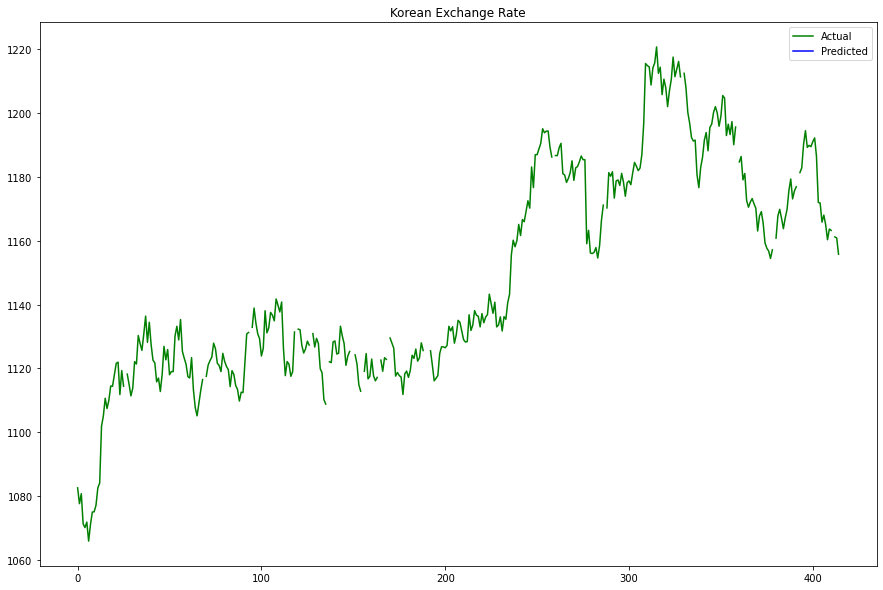

In [132]:
plt.figure(figsize=(15,10))
plt.title('Korean Exchange Rate')
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'b')
plt.legend()